In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [3]:
df=pd.read_csv('/content/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(df.info())
print("Missing value\n",df.isnull().sum())
print("Summary\n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Missing value
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age       

In [7]:
x=df.drop('outcome',axis=1)
y=df['outcome']
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.2,random_state=42)

In [9]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [10]:
y_pred=log.predict(x_test)
y_prob=log.predict_proba(x_test)[:,1]

In [14]:
print("confusion",confusion_matrix(y_test,y_pred))
print("classification",classification_report(y_test,y_pred))
roc=roc_auc_score(y_test,y_prob)
print("ROC",roc)

confusion [[79 20]
 [18 37]]
classification               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

ROC 0.8146923783287419


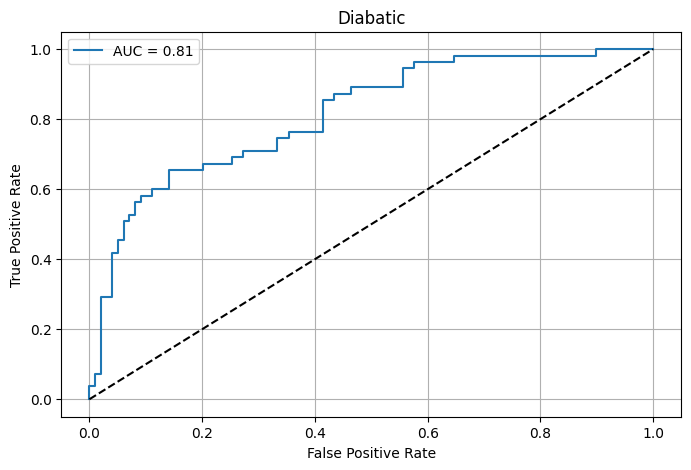

In [18]:
fpr,tpr,threshold=roc_curve(y_test,y_prob)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr,label=f"AUC = {roc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Diabatic")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
feature=pd.DataFrame({
'feature':x.columns,
'coefficient':log.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)
print(" Prediction\n:")
print(feature)

 Prediction
:
                    feature  coefficient
1                   Glucose     1.069330
5                       BMI     0.792371
7                       Age     0.430362
2             BloodPressure    -0.258676
6  DiabetesPedigreeFunction     0.227094
0               Pregnancies     0.216242
4                   Insulin    -0.198998
3             SkinThickness     0.047203
